# Forecast Data

## Import Data

In [1]:
# import library pandas
import pandas as pd

# Import library numpy
import numpy as np

In [2]:
USD = pd.read_excel('Exchange Rates Jisdor.xlsx')
USD

,Date,Exchange Rates
0,5/30/2013 12:00:00 AM,9811
1,5/31/2013 12:00:00 AM,9802
2,6/3/2013 12:00:00 AM,9811
3,6/4/2013 12:00:00 AM,9805
4,6/5/2013 12:00:00 AM,9807
...,...,...
2058,11/18/2021 12:00:00 AM,14231
2059,11/19/2021 12:00:00 AM,14237
2060,11/22/2021 12:00:00 AM,14255
2061,11/23/2021 12:00:00 AM,14272


In [3]:
USD['Exchange Rates'].shift(1)

0           NaN
1        9811.0
2        9802.0
3        9811.0
4        9805.0
         ...   
2058    14259.0
2059    14231.0
2060    14237.0
2061    14255.0
2062    14272.0
Name: Exchange Rates, Length: 2063, dtype: float64

In [4]:
import pandas as pd
import numpy as np
returns = np.log(USD['Exchange Rates'] / USD['Exchange Rates'].shift(1)).dropna()
returns

1      -0.000918
2       0.000918
3      -0.000612
4       0.000204
5      -0.001735
          ...   
2058   -0.001966
2059    0.000422
2060    0.001264
2061    0.001192
2062    0.000000
Name: Exchange Rates, Length: 2062, dtype: float64

In [5]:
df = USD.reset_index()

In [6]:
data = np.log(df['Exchange Rates'] / df['Exchange Rates'].shift(1)).dropna()

In [7]:
data

1      -0.000918
2       0.000918
3      -0.000612
4       0.000204
5      -0.001735
          ...   
2058   -0.001966
2059    0.000422
2060    0.001264
2061    0.001192
2062    0.000000
Name: Exchange Rates, Length: 2062, dtype: float64

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


<ipython-input-9-b764c20a03e4>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  fig.add_subplot(212).plot(returns, label = "Returns")


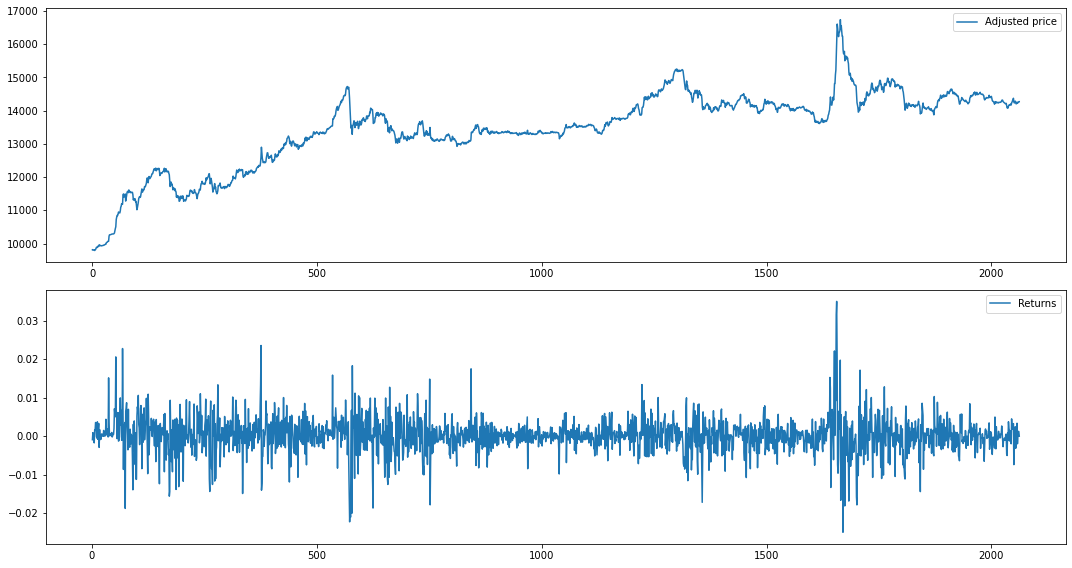

In [9]:
fig = plt.figure(figsize = (15, 8))
ax = fig.add_subplot(211)
ax.plot(USD['Exchange Rates'], label = "Adjusted price")
plt.legend()
ax = fig.add_subplot(212)
fig.add_subplot(212).plot(returns, label = "Returns")
plt.legend()
plt.tight_layout()
plt.show()

In [10]:
#Import the required modules for vectors and matrix operations, data generation
import numpy as np
#Import the required modules for plot creation:
import matplotlib.pyplot as plt
#import the required modules for TimeSeries data generation:
import statsmodels.api as sm
#Import the required modules for test statistic calculation:
import statsmodels.stats as sm_stat
#Import the required modules for time series model estimation:
import statsmodels.tsa as smt
#Import Pandas
import pandas as pd

In [11]:
import arch as arch

In [12]:
def tsdisplay(y, figsize = (14, 8), title = "", lags = 20):
    tmp_data = pd.Series(y)
    fig = plt.figure(figsize = figsize)
    #Plot the time series
    tmp_data.plot(ax = fig.add_subplot(311), title = "$Time\ Series\ " + title + "$", legend = False)
    #Plot the ACF:
    sm.graphics.tsa.plot_acf(tmp_data, lags = lags, zero = False, ax = fig.add_subplot(323))
    plt.xticks(np.arange(1,  lags + 1, 1.0))
    #Plot the PACF:
    sm.graphics.tsa.plot_pacf(tmp_data, lags = lags, zero = False, ax = fig.add_subplot(324))
    plt.xticks(np.arange(1,  lags + 1, 1.0))
    #Plot the QQ plot of the data:
    sm.qqplot(tmp_data, line='s', ax = fig.add_subplot(325)) 
    plt.title("QQ Plot")
    #Plot the residual histogram:
    fig.add_subplot(326).hist(tmp_data, bins = 40, density=True, stacked=True)
    plt.title("Histogram")
    #Fix the layout of the plots:
    plt.tight_layout()
    plt.show()

In [13]:
# Suppress matplotlib's annoying deprecation warning
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore", category = matplotlib.cbook.mplDeprecation)

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


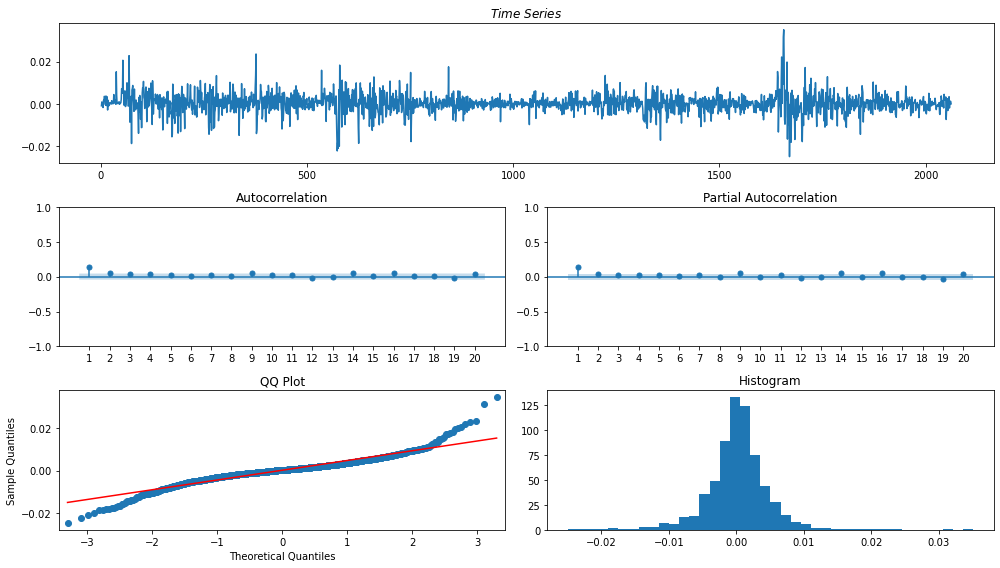

In [14]:
tsdisplay(returns)

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


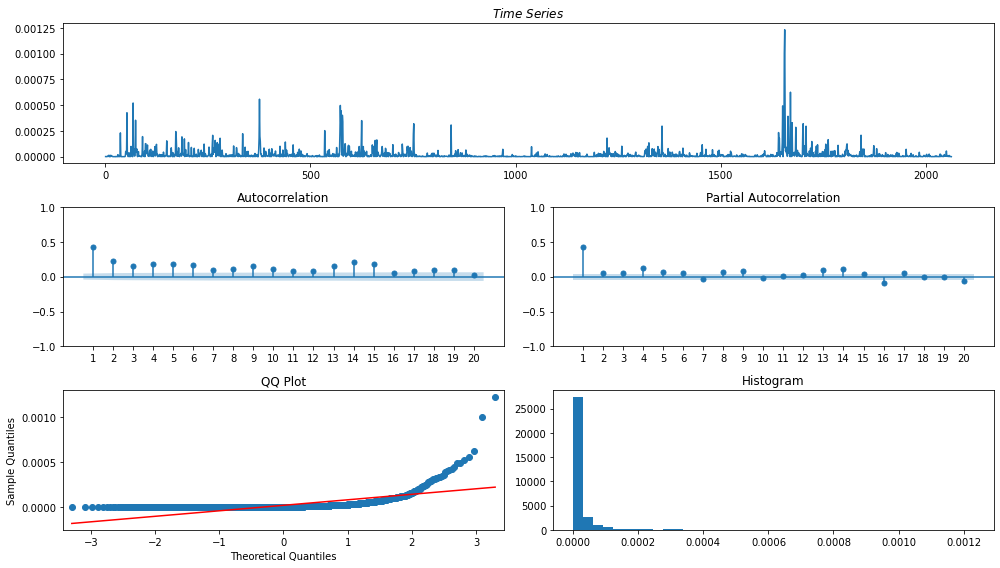

In [15]:
tsdisplay(returns**2)

In [16]:
warnings.filterwarnings("ignore", category = FutureWarning)
warnings.filterwarnings("ignore", category = RuntimeWarning)
warnings.filterwarnings("ignore", category = sm.tools.sm_exceptions.HessianInversionWarning)
warnings.filterwarnings("ignore", category = sm.tools.sm_exceptions.ConvergenceWarning)

# TES ARIMA

In [17]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(returns, order=(1,0,1))
model_fit = model.fit()
print(model_fit.summary())

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


                               SARIMAX Results                                
Dep. Variable:         Exchange Rates   No. Observations:                 2062
Model:                 ARIMA(1, 0, 1)   Log Likelihood                8183.011
Date:                Wed, 08 Dec 2021   AIC                         -16358.021
Time:                        21:59:43   BIC                         -16335.496
Sample:                             0   HQIC                        -16349.763
                               - 2062                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      1.478      0.139   -5.88e-05       0.000
ar.L1          0.3912      0.095      4.104      0.000       0.204       0.578
ma.L1         -0.2646      0.102     -2.594      0.0

In [18]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(returns, order=(1,0,0))
model_fit = model.fit()
print(model_fit.summary())

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


                               SARIMAX Results                                
Dep. Variable:         Exchange Rates   No. Observations:                 2062
Model:                 ARIMA(1, 0, 0)   Log Likelihood                8181.503
Date:                Wed, 08 Dec 2021   AIC                         -16357.006
Time:                        21:59:51   BIC                         -16340.111
Sample:                             0   HQIC                        -16350.812
                               - 2062                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      1.560      0.119   -4.65e-05       0.000
ar.L1          0.1314      0.011     11.429      0.000       0.109       0.154
sigma2      2.095e-05   3.57e-07     58.742      0.0

In [19]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(returns, order=(0,0,1))
model_fit = model.fit()
print(model_fit.summary())

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


                               SARIMAX Results                                
Dep. Variable:         Exchange Rates   No. Observations:                 2062
Model:                 ARIMA(0, 0, 1)   Log Likelihood                8180.236
Date:                Wed, 08 Dec 2021   AIC                         -16354.471
Time:                        21:59:54   BIC                         -16337.577
Sample:                             0   HQIC                        -16348.278
                               - 2062                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      1.584      0.113   -4.27e-05       0.000
ma.L1          0.1266      0.012     10.501      0.000       0.103       0.150
sigma2      2.094e-05    3.5e-07     59.821      0.0

# Cek Hetero

In [20]:
cek = returns.to_frame(name="returns")

In [21]:
cek['Time_Period'] = range(1, len(cek)+1)

In [22]:
cek

,returns,Time_Period
1,-0.000918,1
2,0.000918,2
3,-0.000612,3
4,0.000204,4
5,-0.001735,5
...,...,...
2058,-0.001966,2058
2059,0.000422,2059
2060,0.001264,2060
2061,0.001192,2061


In [28]:
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip
from patsy import dmatrices
import statsmodels.formula.api as smf

In [24]:
expr = 'returns ~ Time_Period'

In [25]:
y, X = dmatrices(expr, cek, return_type='dataframe')

In [29]:
olsr_results = smf.ols(expr, cek).fit()

In [30]:
keys = ['Lagrange Multiplier statistic:', 'LM test\'s p-value:', 'F-statistic:', 'F-test\'s p-value:']
results = het_white(olsr_results.resid, X)
lzip(keys, results)

[('Lagrange Multiplier statistic:', 7.1454137999011405),
 ("LM test's p-value:", 0.028079741661649074),
 ('F-statistic:', 3.5799143921914247),
 ("F-test's p-value:", 0.028051743093462148)]

# Model ARCH-GARCH

### ARCH(1)

In [31]:
mdl_arch = arch.univariate.ConstantMean(returns)

In [32]:
mdl_arch.volatility = arch.univariate.ARCH(1)

In [33]:
mdl_arch.distribution = arch.univariate.Normal()

In [34]:
mdl_arch_fit = mdl_arch.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 528561807719.6732
Iteration:      2,   Func. Count:     17,   Neg. LLF: 1443.4125296945297
Iteration:      3,   Func. Count:     26,   Neg. LLF: -2303.830391884995
Iteration:      4,   Func. Count:     35,   Neg. LLF: -1612.4087385055384
Iteration:      5,   Func. Count:     44,   Neg. LLF: 45990712.78629837
Iteration:      6,   Func. Count:     54,   Neg. LLF: 1202538651.0210478
Iteration:      7,   Func. Count:     66,   Neg. LLF: -4003.9420382749086
Iteration:      8,   Func. Count:     74,   Neg. LLF: -3988.6182516376803
Iteration:      9,   Func. Count:     82,   Neg. LLF: 31769906.59172812
Optimization terminated successfully    (Exit mode 0)
            Current function value: -8346.615996408054
            Iterations: 11
            Function evaluations: 90
            Gradient evaluations: 9


C:\Users\Dell\anaconda3\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 2.132e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [35]:
print(mdl_arch_fit.summary())

                      Constant Mean - ARCH Model Results                      
Dep. Variable:         Exchange Rates   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                8346.62
Distribution:                  Normal   AIC:                          -16687.2
Method:            Maximum Likelihood   BIC:                          -16670.3
                                        No. Observations:                 2062
Date:                Wed, Dec 08 2021   Df Residuals:                     2061
Time:                        22:03:29   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         1.6226e-04  8.661e-05      1.874  6.099e-02 

In [36]:
print(mdl_arch_fit.params)

mu          0.000162
omega       0.000013
alpha[1]    0.400143
Name: params, dtype: float64


In [37]:
print(pd.DataFrame([mdl_arch_fit.aic, mdl_arch_fit.bic], index = ["AIC", "BIC"], columns = ["ARCH"]).T)

               AIC           BIC
ARCH -16687.231993 -16670.337698


### GARCH (1,1)

In [38]:
mdl_garch = arch.univariate.ConstantMean(returns)
mdl_garch.volatility = arch.univariate.GARCH(1, 0, 1)
mdl_garch.distribution = arch.univariate.Normal()

In [39]:
mdl_garch_fit = mdl_garch.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2.4611034583221242e+22
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1.2416807131385076e+22
Iteration:      3,   Func. Count:     32,   Neg. LLF: 1.4890731510991421e+21
Iteration:      4,   Func. Count:     47,   Neg. LLF: 1.106587356445665e+24
Iteration:      5,   Func. Count:     61,   Neg. LLF: 2.945414175235903e+20
Iteration:      6,   Func. Count:     76,   Neg. LLF: 3.3327012881626993e+19
Iteration:      7,   Func. Count:     90,   Neg. LLF: -1108.534891043413
Inequality constraints incompatible    (Exit mode 4)
            Current function value: -1108.5348551437164
            Iterations: 9
            Function evaluations: 90
            Gradient evaluations: 7


C:\Users\Dell\anaconda3\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 2.132e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


In [40]:
print(mdl_garch_fit.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:         Exchange Rates   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                1108.53
Distribution:                  Normal   AIC:                          -2209.07
Method:            Maximum Likelihood   BIC:                          -2186.54
                                        No. Observations:                 2062
Date:                Wed, Dec 08 2021   Df Residuals:                     2061
Time:                        22:03:53   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0992  1.127e-07  8.806e+05      0.000 [9.

In [41]:
print(pd.DataFrame([mdl_garch_fit.aic, mdl_garch_fit.bic], index = ["AIC", "BIC"], columns = ["GARCH"]).T)

              AIC          BIC
GARCH -2209.06971 -2186.543984


### AR(1)−GARCH(1,1) 

In [42]:
mdl_ar_garch = arch.univariate.ARX(returns, lags = 1)

In [43]:
mdl_ar_garch.volatility = arch.univariate.GARCH(1, 0, 1)

In [44]:
mdl_ar_garch.distribution = arch.univariate.Normal()

In [45]:
mdl_ar_garch_fit = mdl_ar_garch.fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 1.9801799301315925e+22
Iteration:      2,   Func. Count:     21,   Neg. LLF: 5.2985971843760914e+19
Iteration:      3,   Func. Count:     37,   Neg. LLF: 1.730298973900702e+24
Iteration:      4,   Func. Count:     52,   Neg. LLF: 6.551774548190412e+24
Iteration:      5,   Func. Count:     68,   Neg. LLF: 45190697161978.58
Iteration:      6,   Func. Count:     83,   Neg. LLF: 1.5833615142099305e+28
Iteration:      7,   Func. Count:     99,   Neg. LLF: 4.997755941737085e+29
Iteration:      8,   Func. Count:    115,   Neg. LLF: 61369060821294.445
Iteration:      9,   Func. Count:    131,   Neg. LLF: 8.981688600945864e+30
Iteration:     10,   Func. Count:    146,   Neg. LLF: 3968.080583549191
Inequality constraints incompatible    (Exit mode 4)
            Current function value: 3968.080666175987
            Iterations: 14
            Function evaluations: 146
            Gradient evaluations: 10


C:\Users\Dell\anaconda3\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 2.096e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


In [46]:
print(mdl_ar_garch_fit.summary())

                           AR - GARCH Model Results                           
Dep. Variable:         Exchange Rates   R-squared:                   -2673.486
Mean Model:                        AR   Adj. R-squared:              -2674.785
Vol Model:                      GARCH   Log-Likelihood:               -3968.08
Distribution:                  Normal   AIC:                           7946.16
Method:            Maximum Likelihood   BIC:                           7974.32
                                        No. Observations:                 2061
Date:                Wed, Dec 08 2021   Df Residuals:                     2059
Time:                        22:04:00   Df Model:                            2
                                 Mean Model                                
                    coef    std err          t      P>|t|  95.0% Conf. Int.
---------------------------------------------------------------------------
Const            -0.2386  3.589e-02     -6.649  2.950e-11 [ -

In [47]:
np.round(mdl_ar_garch_fit.params, 4)

Const           -0.2386
Exch...tes[1]    0.1315
omega            0.0000
alpha[1]         0.1000
beta[1]          0.8800
Name: params, dtype: float64

In [48]:
print(pd.DataFrame([mdl_ar_garch_fit.aic, mdl_ar_garch_fit.bic], index = ["AIC", "BIC"], columns = ["AR-GARCH"]).T)

                  AIC          BIC
AR-GARCH  7946.161332  7974.316065


In [49]:
print(pd.DataFrame([mdl_ar_garch_fit.aic - mdl_garch_fit.aic, mdl_ar_garch_fit.bic - mdl_garch_fit.bic], index = ["AIC", "BIC"], columns = ["Difference"]).T)

                     AIC           BIC
Difference  10155.231043  10160.860049


# Model residual checking

### ARCH(1)

In [81]:
std_resid = mdl_arch_fit.resid / mdl_arch_fit.conditional_volatility

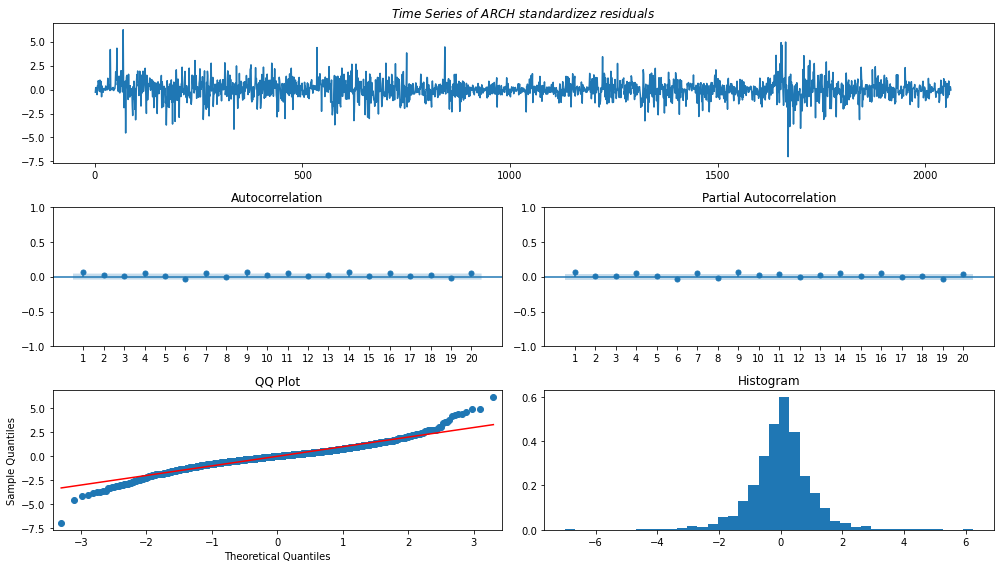

In [51]:
tsdisplay(std_resid, title = 'of\ ARCH\ standardizez\ residuals')

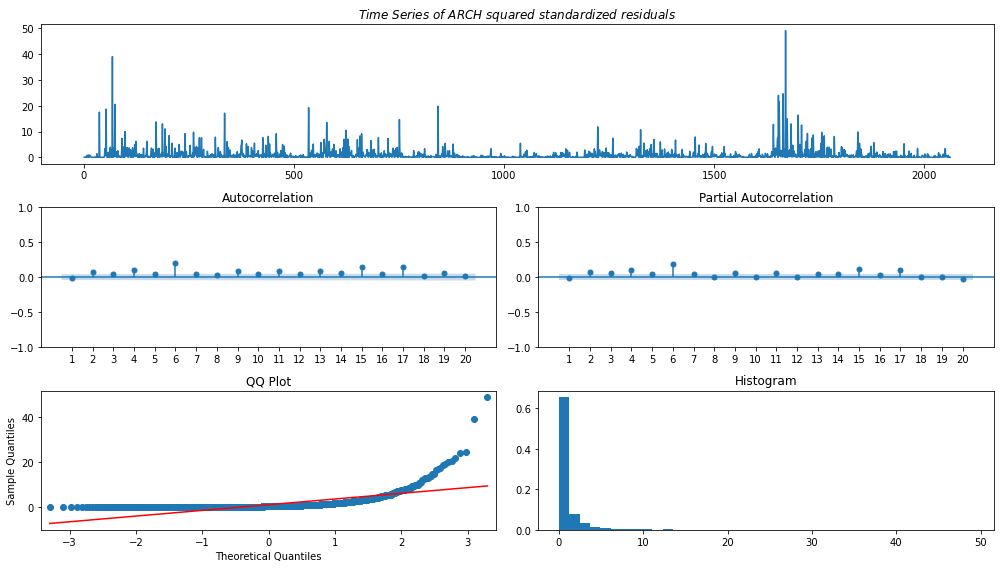

In [52]:
tsdisplay(std_resid**2, title = 'of\ ARCH\ squared\ standardized\ residuals')

### GARCH(1)

In [53]:
std_resid = mdl_garch_fit.resid / mdl_garch_fit.conditional_volatility

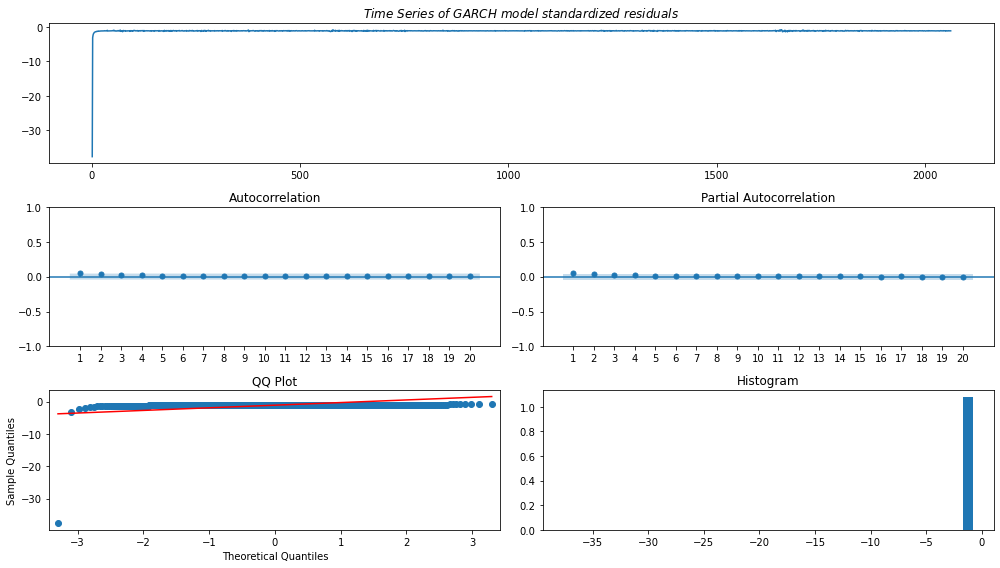

In [54]:
tsdisplay(std_resid, title = 'of\ GARCH\ model\ standardized\ residuals')

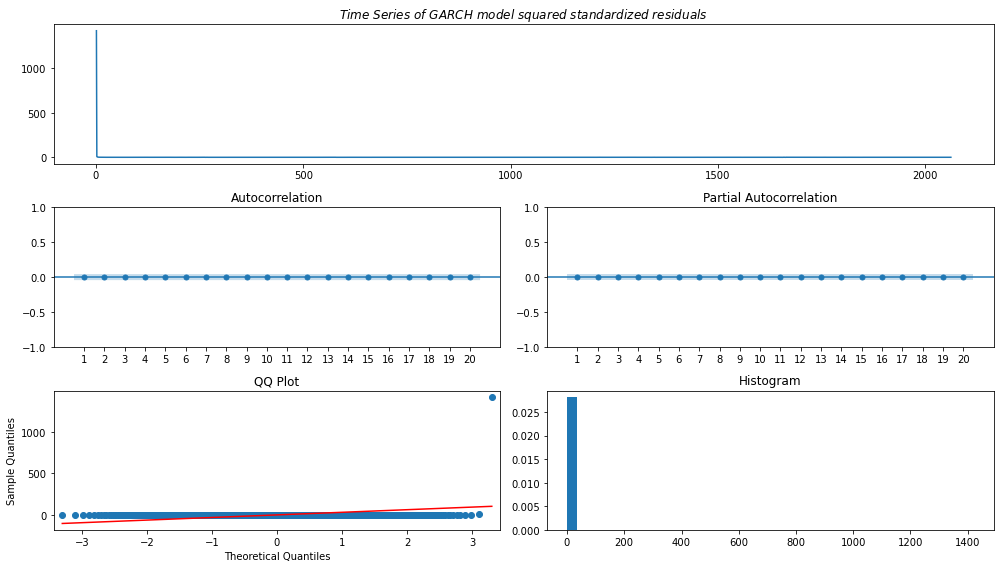

In [55]:
tsdisplay(std_resid**2, title = 'of\ GARCH\ model\ squared\ standardized\ residuals')

# Forecasting

## Looping Forecast

In [56]:
data

1      -0.000918
2       0.000918
3      -0.000612
4       0.000204
5      -0.001735
          ...   
2058   -0.001966
2059    0.000422
2060    0.001264
2061    0.001192
2062    0.000000
Name: Exchange Rates, Length: 2062, dtype: float64

In [57]:
for i in range(30):
    mdl_arch = arch.univariate.ConstantMean(data)
    mdl_arch.volatility = arch.univariate.ARCH(1)
    mdl_arch.distribution = arch.univariate.Normal()
    mdl_arch_fit = mdl_arch.fit()
    mdl_forcs = mdl_arch_fit.forecast(horizon = 1)
    forc_mean = pd.Series(mdl_forcs.mean.dropna().squeeze())
    forc_mean.index = list(range(len(data)+1, len(data) + 2))
    data = data.append(forc_mean)

C:\Users\Dell\anaconda3\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 2.132e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 2.131e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\arch\univariate\base.py:309: DataSca

Iteration:      1,   Func. Count:      5,   Neg. LLF: 528561807719.6732
Iteration:      2,   Func. Count:     17,   Neg. LLF: 1443.4125296945297
Iteration:      3,   Func. Count:     26,   Neg. LLF: -2303.830391884995
Iteration:      4,   Func. Count:     35,   Neg. LLF: -1612.4087385055384
Iteration:      5,   Func. Count:     44,   Neg. LLF: 45990712.78629837
Iteration:      6,   Func. Count:     54,   Neg. LLF: 1202538651.0210478
Iteration:      7,   Func. Count:     66,   Neg. LLF: -4003.9420382749086
Iteration:      8,   Func. Count:     74,   Neg. LLF: -3988.6182516376803
Iteration:      9,   Func. Count:     82,   Neg. LLF: 31769906.59172812
Optimization terminated successfully    (Exit mode 0)
            Current function value: -8346.615996408054
            Iterations: 11
            Function evaluations: 90
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      5,   Neg. LLF: 532768310848.87494
Iteration:      2,   Func. Count:     17,   Neg. LLF: -6279.8

C:\Users\Dell\anaconda3\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 2.124e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 2.123e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\arch\univariate\base.py:309: DataSca

Iteration:      1,   Func. Count:      5,   Neg. LLF: 568783891116.9786
Iteration:      2,   Func. Count:     17,   Neg. LLF: 86250869261.86163
Iteration:      3,   Func. Count:     29,   Neg. LLF: 13073810563.086496
Iteration:      4,   Func. Count:     41,   Neg. LLF: 53474.323499645034
Iteration:      5,   Func. Count:     51,   Neg. LLF: -8426.79536974785
Optimization terminated successfully    (Exit mode 0)
            Current function value: -8426.795369500058
            Iterations: 9
            Function evaluations: 51
            Gradient evaluations: 5
Iteration:      1,   Func. Count:      5,   Neg. LLF: 18021676308.21003
Iteration:      2,   Func. Count:     17,   Neg. LLF: 109039.83383135103
Iteration:      3,   Func. Count:     27,   Neg. LLF: 750733.3645653613
Optimization terminated successfully    (Exit mode 0)
            Current function value: -8431.514846383026
            Iterations: 4
            Function evaluations: 35
            Gradient evaluations: 3
Itera

C:\Users\Dell\anaconda3\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 2.113e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 2.112e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\arch\univariate\base.py:309: DataSca

Iteration:      5,   Func. Count:     53,   Neg. LLF: 5597820.749815647
Optimization terminated successfully    (Exit mode 0)
            Current function value: -8469.282380647637
            Iterations: 8
            Function evaluations: 60
            Gradient evaluations: 5
Iteration:      1,   Func. Count:      5,   Neg. LLF: 592105238196.7484
Iteration:      2,   Func. Count:     17,   Neg. LLF: 3086227799.009534
Iteration:      3,   Func. Count:     29,   Neg. LLF: 4330019.883378844
Iteration:      4,   Func. Count:     39,   Neg. LLF: -8474.004777161023
Optimization terminated successfully    (Exit mode 0)
            Current function value: -8474.004776890506
            Iterations: 8
            Function evaluations: 39
            Gradient evaluations: 4
Iteration:      1,   Func. Count:      5,   Neg. LLF: 18847984200.91411
Iteration:      2,   Func. Count:     17,   Neg. LLF: 432409.02307957894
Iteration:      3,   Func. Count:     27,   Neg. LLF: 1259734710.855459
Iterat

C:\Users\Dell\anaconda3\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 2.103e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 2.102e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [58]:
data[-30:]

2063    0.000162
2064    0.000162
2065    0.000162
2066    0.000161
2067    0.000162
2068    0.000162
2069    0.000161
2070    0.000162
2071    0.000162
2072    0.000162
2073    0.000162
2074    0.000162
2075    0.000162
2076    0.000162
2077    0.000162
2078    0.000162
2079    0.000162
2080    0.000162
2081    0.000162
2082    0.000162
2083    0.000162
2084    0.000161
2085    0.000161
2086    0.000161
2087    0.000161
2088    0.000161
2089    0.000161
2090    0.000161
2091    0.000161
2092    0.000161
dtype: float64

# Grafik Forecast

In [59]:
test = df.copy()
test.drop(index=test.index[0], axis=0, inplace=True)
data_not_forecast = test['Exchange Rates']

In [60]:
last_data = df['Exchange Rates'][-1:]
last_data

2062    14272
Name: Exchange Rates, dtype: int64

In [61]:
import math

In [62]:
data_forecast = []
for i in range(2063, 2093):
    forecast_data = math.exp(data[i])*last_data
    last_data = forecast_data
    data_forecast.append(forecast_data)

In [63]:
forecast_to_frame = pd.DataFrame(data_forecast)

In [64]:
forecast_to_frame = forecast_to_frame.reset_index()
forecast_to_frame = forecast_to_frame.drop(forecast_to_frame.columns[0], axis=1)
forecast_to_frame.iloc[:,-1]
forecast_to_frame['Forecast'] = forecast_to_frame.iloc[:,-1]
forecast_to_frame = forecast_to_frame.drop(forecast_to_frame.columns[0], axis=1)

In [65]:
forecast_to_frame

,Forecast
0,14274.315943
1,14276.631969
2,14278.947518
3,14281.252250
4,14283.568493
5,14285.885100
6,14288.178318
7,14290.493038
8,14292.807725
9,14295.122357


In [66]:
forecast_to_frame.to_excel('forecast_excel.xlsx')

In [67]:
test_again = data.copy()

In [68]:
test_again[:-30] = data_not_forecast

In [69]:
test_again

1       9802.000000
2       9811.000000
3       9805.000000
4       9807.000000
5       9790.000000
           ...     
2088       0.000161
2089       0.000161
2090       0.000161
2091       0.000161
2092       0.000161
Length: 2092, dtype: float64

In [70]:
test_again = pd.DataFrame(test_again)
test_again['Data'] = test_again.iloc[:,-1]
test_again = test_again.drop(test_again.columns[0], axis=1)

In [71]:
test_again[-30:] = forecast_to_frame

In [72]:
test_again

,Data
1,9802.000000
2,9811.000000
3,9805.000000
4,9807.000000
5,9790.000000
...,...
2088,14332.135119
2089,14334.443584
2090,14336.756574
2091,14339.069006


In [73]:
before = test_again[1500:-30]
after = test_again[-30:]

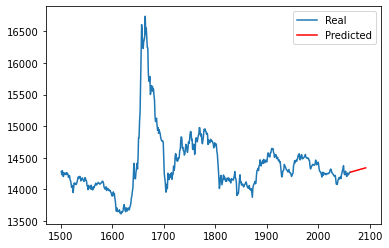

In [74]:
ax = plt.gca()

before.plot(kind='line',y='Data',ax=ax, label="Real")
after.plot(kind='line',y='Data', color='red', ax=ax, label = "Predicted")
plt.savefig('Forecast.png')
plt.show()